# Inaugural Project

## Table of Contents

Below a table of contents over the different questions is given:

1. [Introduction](#introduction)
2. [Question 1 - Pareto Improvements](#question1)
3. [Question 2 - Errors for the Market Clearing Conditions](#question2)
4. [Question 3 - The Market Clearing Price](#question3)
5. [Question 4 - Consumer A Maximizes Her Own Utility](#question4)
6. [Question 4.a - Optimal Allocation with a Restricted Set of Prices](#question4a)
7. [Question 4.b - Optimal Allocation with Any Positive Price](#question4b)
8. [Question 5](#question5)
9. [Question 5.a - Optimal Allocation with a Restricted Choice Set](#question5a)
10. [Question 5.b - Optimal Allocation With No Further Restrictions](#question5b)
11. [Question 6](#question6)
12. [Question 6.a - Optimal Allocation Under an Utilitarian Social Planner](#question6a)
13. [Question 6.b - Comparison of the Different Allocations](#question6b) 
14. [Question 7 - Random Endowments](#question7)
15. [Question 8](#question8)
16. [Conclusion](#conclusion)

## 1. <a id='introduction'></a>[Introduction](#introduction)

Before we begin answering the questions, we import the packages used in the coding.

In [15]:
# 1. autoreloads the modules when the code is run. 
# Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# 2. Import the classic Python packages
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# 3. Update Matplot lib settings
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# 4. Import local user-written modules 
# a. Import EdgeworthBoxClass to answer question 1, 3, 6.a
from inauguralproject import EdgeworthBoxClass
# b. Import ErrorMarketClass to answer question 2 
from inauguralproject import ErrorMarketClass 
# c. Import PointPlotter to answer question 7
from inauguralproject import PointPlotter
# d. Import RandomParetoImprovements to answer question 8
from inauguralproject import RandomParetoImprovements

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Questions

### 2. <a id='question1'></a>[Question 1 - Pareto Improvements](#question1)

In this question, we need to illustrate the set for consumer A in the Edgeworth box. This is given by the following:

$$
\begin{aligned}
    \mathcal{C} = \left\{\begin{matrix} \left(x_1^A, x_2^A \right) \mid\\
    &
    u_A(x_{A1}, x_{A2}) \geq u_A(\omega_{A1}, \omega_{A2}) \\
    u_B(x_{B1}, x_{B2}) \geq u_B(\omega_{B1}, \omega_{B2}) \\
    x_{B1} = 1 - x_{A1}, \; x_{B2} = 1 - x_{A2} \\
    x_{A1}, x_{A2} \in \left\{0, \frac{1}{N}, \frac{2}{N}, \ldots, 1\right\}, \; N = 50 
    \end{matrix}\right\}
\end{aligned}
$$

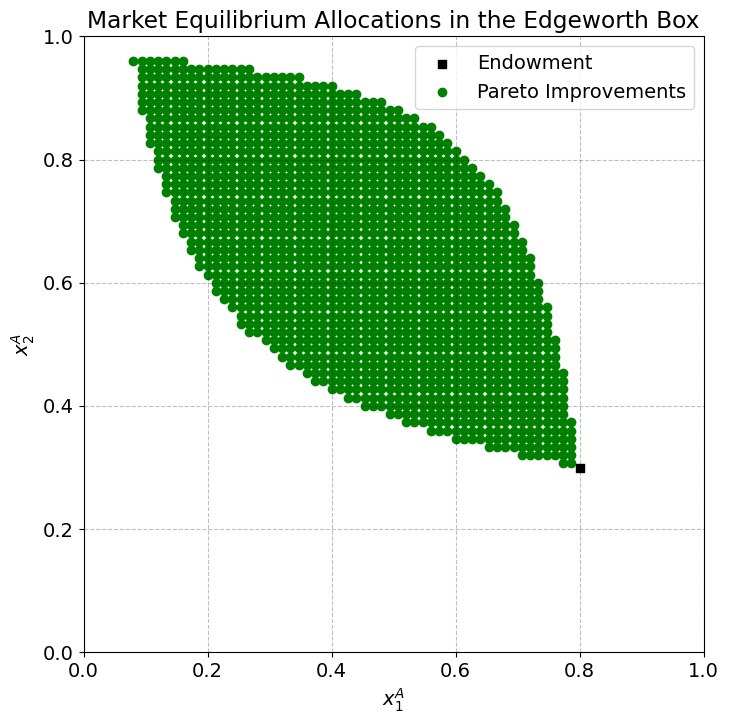

In [16]:
# 1. The code for solving the model is in the class below
# 2. Set the values of the parameters
# a. Set the value of alpha
alpha = 1/3
# b. Set the value of beta
beta = 2/3
# c. Set the value of the endowments for consumer A
endowment_A = [0.8, 0.3]

# 3. Create an instance of the EdgeworthBoxClass
box = EdgeworthBoxClass(alpha, beta, endowment_A)

# 4. The Edgeworth box with Pareto improvements for the set C
box.plot_edgeworth_box()

Above is the figure for the set of consumer A in the Edgeworth box. Generally, the Edgeworth box is an illustration of the distribution of the goods between two consumers (in this case Consumer A and Consumer B). The set is in this case, the feasible allocations of the goods, $x_1$ and $x_2$, for consumer A ($x_1^A$, $x_2^A$) and consumer B ($x_1^B$, $x_2^B$).

### 3. <a id='question2'></a>[Question 2 - Errors for the Market Clearing Conditions](#question2)

In this question, we calculate the errors, which are in the market clearing conditions. These errors are given by the following:

$$
\begin{aligned}
    \epsilon_1(\bm{p}, \bm{\omega}) &= x_1^{A*}\left(\bm{p}, \bm{\omega}^A \right) - \omega_1^A + x_1^{B*}\left(\bm{p}, \bm{\omega}^B\right) - \omega_1^B\\
    \epsilon_2(\bm{p}, \bm{\omega}) &= x_2^{A*}\left(\bm{p}, \bm{\omega}^A \right) - \omega_2^A + x_2^{B*}\left(\bm{p}, \bm{\omega}^B\right) - \omega_2^B
\end{aligned}
$$

In [17]:
# 1. We create an instance for the class
errormarket = ErrorMarketClass()

# 2. We find the errors in the market clearing condition
result = errormarket.check_market_clearing()

# 3. We print the errors in the market clearing condition
print("Errors in the market clearing condition:")

# 4. For-loop for every error in all of the errors
for eps1, eps2 in result:
    # a. Print statement for each error in all of the errors 
    print(f"Error 1: {eps1}, Error 2: {eps2}")

Errors in the market clearing condition:
Error 1: 0.53, Error 2: -0.27
Error 1: 0.48, Error 2: -0.25
Error 1: 0.42, Error 2: -0.23
Error 1: 0.38, Error 2: -0.22
Error 1: 0.33, Error 2: -0.2
Error 1: 0.29, Error 2: -0.19
Error 1: 0.26, Error 2: -0.17
Error 1: 0.23, Error 2: -0.15
Error 1: 0.19, Error 2: -0.14
Error 1: 0.17, Error 2: -0.12
Error 1: 0.14, Error 2: -0.11
Error 1: 0.11, Error 2: -0.09
Error 1: 0.09, Error 2: -0.07
Error 1: 0.07, Error 2: -0.06
Error 1: 0.05, Error 2: -0.04
Error 1: 0.03, Error 2: -0.03
Error 1: 0.01, Error 2: -0.01
Error 1: -0.01, Error 2: 0.01
Error 1: -0.02, Error 2: 0.02
Error 1: -0.04, Error 2: 0.04
Error 1: -0.05, Error 2: 0.05
Error 1: -0.07, Error 2: 0.07
Error 1: -0.08, Error 2: 0.09
Error 1: -0.09, Error 2: 0.1
Error 1: -0.1, Error 2: 0.12
Error 1: -0.11, Error 2: 0.13
Error 1: -0.13, Error 2: 0.15
Error 1: -0.14, Error 2: 0.17
Error 1: -0.15, Error 2: 0.18
Error 1: -0.15, Error 2: 0.2
Error 1: -0.16, Error 2: 0.21
Error 1: -0.17, Error 2: 0.23
Err

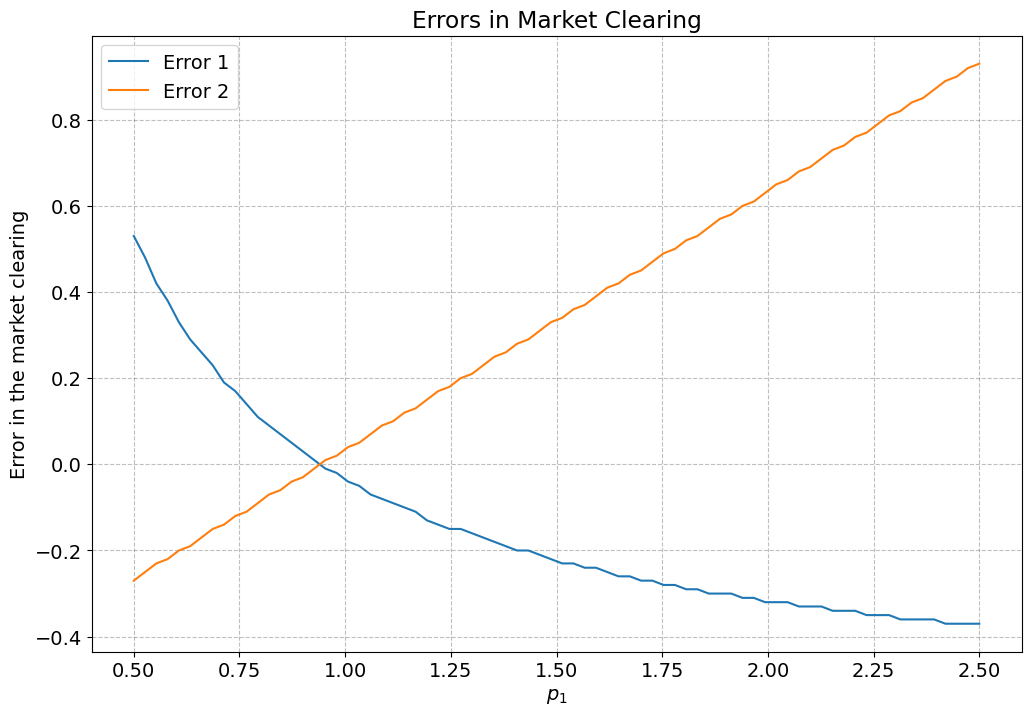

In [18]:
# 1. Lists to store the errors
error1 = [] # Errors for the first good
error2 = [] # Errors for the second good

# 2. Iterate over the result and append errors
for eps1, eps2 in result:
 # a. Adds the error for good 1 to the list of errors for good 1
 error1.append(eps1)
 # b. Adds the error for good 2 to the list of errors for good 2
 error2.append(eps2)

# 3. Setting the size of the figure
plt.figure(figsize=(12, 8))

# 4. Plotting the errors for the first good
plt.plot(errormarket.rho1, error1, label='Error 1')

# 5. Plotting the errors for the second good 
plt.plot(errormarket.rho1, error2, label='Error 2')

# 6. Makes a label for the x-axis
plt.xlabel('$p_1$')

# 7. Makes a label for the y-axis
plt.ylabel('Error in the market clearing')

# 8. Makes a title for the figure
plt.title('Errors in Market Clearing')

# 9. Make grids in the figure
plt.grid(True)

# 10. Make a legend for the figure
plt.legend()

# 11. Show the plot
plt.show()

### 4. <a id='question3'></a>[Question 3 - The Market Clearing Price](#question3)

For question 3, we should find the market clearing price

In [19]:
# 1. Create an instance of the class with given parameters
# 2. Sets the value for alpha
alpha = 1/3

# 3. Sets the value for beta
beta = 2/3

# 4. Sets the values for the endowments for consumer A
endowment_A = [0.8, 0.3] # 0.8 is for good 1, 0.3 is for good 2

# 5. Creates the instance
box = EdgeworthBoxClass(alpha, beta, endowment_A)

# 6. Calculates the market clearing price
p1_clear = box.market_clearing_price()

# 7. Print statement for the market clearing price
print(f'The market clearing price for good 1 is given by: {p1_clear:.2f}')

The market clearing price for good 1 is given by: 0.94


So, we have that the market clearing price for $p_1$ is 0.94. Here, demand will be equal to supply, hence there will be no excess supply or excess demand. This price clears the market.

Now we want to find the optimal allocations for the goods for consumer A. This will be used in question 6.b when plotting the previous results.

In [20]:
# 1. Sets the numeraire which is good 2
p2 = 1

# 2. Sets the value of endowment of good 1 for consumer A
omega1 = 0.8

# 3. Set the value of endowment of good 2 for consumer A
omega2 = 0.3

# 4. Calculates the optimal allocation of good 1 for consumer A
x1A = alpha * (p1_clear * omega1 + p2*omega2)/p1_clear

# 5. Calculates the optimal allocation of good 2 for consumer A
x2A = (1-alpha)*((p1_clear*omega1 + p2 * omega2)/p1_clear)

# 6. Print statement for the optimal allocation of good 1 for consumer A
print(f"The optimal allocation of good 1 for consumer A is: {round(x1A,2)}")

# 7. Print statement for the optimal allocation of good 2 for consumer A
print(f"The optimal allocation of good 2 for consumer A is: {round(x2A,2)}")

The optimal allocation of good 1 for consumer A is: 0.37
The optimal allocation of good 2 for consumer A is: 0.75


### 5. <a id='Question4'></a>[Question 4 - Consumer A Maximizes Her Own Utility](#question4)

For question 4.a and question 4.b, we assume that consumer A chooses the price that maximizes her own utility.

#### 6. <a id='question4a'></a>[Question 4a - Optimal Allocation with a Restricted Set of Prices](#question4a)

In question 4.a, we want to find the optimal allocation if the prices in the price vector, $\mathcal{P}_1 = \left\{0.5, 0.5 + 2 \dfrac{1}{N}, 0.5 + 2 \dfrac{2}{N},...,2.5 \right\}$, can only be choosen. The objective function becomes:

$$
\begin{aligned}
    \max_{p_1 \in \mathcal{P}_1}{u^A\left(1 - x_1^B\left(\bm{p}, \bm{\omega}^B\right), 1 - x_2^B \left(\bm{p}, \bm{\omega}^B\right)\right)}
\end{aligned}
$$

In [21]:
# 1. We create an instance of the ErrorMarketClass
model = ErrorMarketClass()

# 2. Set the number of allocations to 75
N = 75
 
# 3. Define the price vector
rho1 = [0.5 + 2 * i / N for i in range(N + 1)]

# 4. Set the maximum utility for consumer A to negative infinity
max_utility_A = float('-inf')

# 5. Assign the optimal price to be none
optimal_price_A = None

# 6. Iterate over possible prices in the price vector, rho1
for p1 in rho1:
    # a. Check if price is positive
    if p1 > 0:
        # i. Calculate demand for consumer B
        xB1, xB2 = model.demand_B(p1)
        # ii. Check if the allocation is feasible for consumer A
        if 1 - xB1 > 0 and 1 - xB2 > 0:
            # i.a Calculate utility for consumer A
            utility_A = model.utility_A(1 - xB1, 1 - xB2)
            # i.b Checks if the calculated utility for consumer A is greater than the current maximum utility
            if utility_A > max_utility_A:
                # i.b.1 Updates to a new higher utiity value
                max_utility_A = utility_A
                # i.b.2 Update the optimal price to the current price, as this will increase utility for consumer A
                optimal_price_A = p1

# 7. If optimal price is found, proceed with calculations
if optimal_price_A is not None:
    # a. Calculate the demand for consumer B using the optimal price for consumer A
    optimal_xB1, optimal_xB2 = model.demand_B(optimal_price_A)

    # b. Calculate the demand for consumer A using the optimal price to find the optimal allocation
    optimal_xA1, optimal_xA2 = model.demand_A(optimal_price_A)

    # c. Calculate the allocation of good 1 for consumer A based on the demand function for consumer B
    allocation_A1 = (1 - model.demand_B(optimal_price_A)[0])
    
    # d. Calculate the allocation of good 2 for consumer A based on the demand function for consumer B
    allocation_A2 = (1 - model.demand_B(optimal_price_A)[1])

    # e. Calculate the utility for consumer B
    utility_B = model.utility_B(optimal_xB1, optimal_xB2)

    # f. Print statement for the optimal price
    print(f"Optimal price for consumer A: {optimal_price_A:.4f}")
    # g. Print statement for the optimal allocations for consumer A
    print(f"Allocation for consumer A: x1A = {allocation_A1:.3f}, x2A = {allocation_A2:.4f}")
    # h. Print statement for the maximum utiltiy for consumer A
    print(f"Utility for consumer A: {max_utility_A:.4f}")
    # i. Print statement for the maximum utility for consumer B
    print(f"Utility for consumer B: {utility_B:.4f}")

Optimal price for consumer A: 1.8867
Allocation for consumer A: x1A = 0.619, x2A = 0.6409
Utility for consumer A: 0.6336
Utility for consumer B: 0.3734


#### 7. <a id='question4b'></a>[Question 4b - Optimal Allocation with Any Positive Price](#question4b)

For question 4.b, every positive price can be choosen. The objective function becomes:

$$
\begin{aligned}
    \max_{p_1 > 0}{u^A\left(1 - x_1^B\left(\bm{p}, \bm{\omega}^B\right), 1 - x_2^B \left(\bm{p}, \bm{\omega}^B\right)\right)}
\end{aligned}
$$

In [22]:
# 1. Define the negative utility function to maximize
def negative_utility_A(p1):
    """
    Calculates the negative utility for consumer A given the price of good 1.
    Finds the price of good 1 which maximizes the utility for consumer A by minizing her negative utility.
    
    Args: 
        p1 (float): The price of good 1, which must be positive.

    Returns: 
        float: The negative utility value for consumer A and returns positive infinity if the price for good 1 is non-positive.

    Notes: 
        - The function will return positive infinity if the price is non-positive to avoid negative prices. 
        - The utility for consumer A is based on the demand for the goods for consumer B.

    """
    # a. Checks if the price is positive
    if p1 <= 0:
        # i. Return positive infinity to avoid p1 being zero
        return float('inf') 
    # b. Calculate the negative utility
    return -model.utility_A(1 - model.demand_B(p1)[0], 1 - model.demand_B(p1)[1])

# 2. Set bounds for the optimization
bounds = (1e-6, 10)  # Minimum bound for p1 is 1e-6

# 3. Find the minimum of the negative utility function within the specified bounds
result = minimize_scalar(negative_utility_A, bounds=bounds)

# 4. Check if optimization was successful
if result.success:
    # a. Set maximum utility for consumer A to negative
    max_utility_A_4b = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
    # b. Calculate the optimal price for good 1 
    optimal_p1 = result.x
# 5. If the result of the if-statement is 'False'
else:
    # a. Print statement for the failed optimization 
    print("Optimization failed:", result.message)

# 6. Calculate the optimal allocation for good 1 for consumer A
x1A = (1-model.demand_B(optimal_p1)[0])

# 7. Calculate the optimal allocation for good 2 for consumer A
x2A = (1-model.demand_B(optimal_p1)[1])

# 8. Calculate utility for consumer B
utility_B_4b = model.utility_B(1-x1A, 1-x2A)

# 9. Print statement for the optimal price for consumer A
print(f"Optimal price for consumer A: {optimal_p1:.3f}")
# 10. Print statement for the optimal allocation for consumer A
print(f"Allocation for consumer A: x1A = {x1A:.2f}, x2A = {x2A:.2f}")
# 11. Print statement for the utility for consumer A
print(f"Utility for consumer A: {max_utility_A_4b:.3f}")
# 12. Print statement for the utility for consumer B
print(f"Utility for consumer B: {utility_B_4b:.3f}")

Optimal price for consumer A: 1.899
Allocation for consumer A: x1A = 0.62, x2A = 0.64
Utility for consumer A: 0.634
Utility for consumer B: 0.373


### 8. <a id='question5'></a>[Question 5](#question5)

#### 9. <a id='question5a'></a>[Question 5.a - Optimal Allocation with a Restricted Choice Set](#question5a)

Find the allocation if the choice set is restricted to C. The objective function becomes:

$$
\begin{aligned}
    \max_{\left(x_1^A, x_2^A\right) \in \mathcal{C}}{u^A\left(x_1^A, x_2^A\right)}
\end{aligned}
$$

In [23]:
# 1. Define the initial endowments
w1A = 0.8 
w2A = 0.3
w1B = 1-w1A
w2B = 1-w2A

# 2.. Initialize an empty list to store valid combinations
list = []

# 3. Define the utility with initial endowment
uA_0 = model.utility_A(w1A, w2A)
uB_0 = model.utility_B(w1B, w2B)

# 4. Loop through possible combinations of x_A1 and x_A2
for xA1 in np.linspace(0, 1, N + 1):
    # a. Loop through consumption of good 2 for consumer in the  
    for xA2 in np.linspace(0, 1, N + 1):
        # i. Calculate the consumption of good 1 for consumer B by using that aggregate consumption sums to 1
        xB1 = 1 - xA1
        # ii. Calculate the consumption of good 2 for consumer B by using that aggregate consumption sums to 1
        xB2 = 1 - xA2
        
        # iii. Compute utility for consumers A and B
        uA = model.utility_A(xA1, xA2)
        uB = model.utility_B(xB1, xB2)
        
        # iv. Check if the combination satisfies initial conditions
        if uA >= uA_0 and uB >= uB_0:
            # I. Append the consumption of the goods for consumer to the list
            list.append((xA1, xA2))

# 5. Initialize variables to track optimal allocation and utility
uA_C = -np.inf
xA1_C = np.nan
xA2_C = np.nan

# 6. Find the allocation with the highest utility for consumer A within constraint set C
for xA1, xA2 in list:
    # a. Check if the utility function is greater than the current maximum utility value
    if model.utility_A(xA1, xA2) > uA_C:
        # i. Set the calculated utility function equal to the maximum utility
        uA_C = model.utility_A(xA1, xA2)
        # ii. The optimal allocation of good 1 is set equal to the current value of good 1 
        xA1_C = xA1
        # iii. The optimal allocation of good 2 is set equal to the current value of good 1 
        xA2_C = xA2

# 7. Print statement for the allocations of the two goods for consumer A
print(f"Allocation for consumer A: x1A = {xA1_C:.3f}, x2A = {xA2_C:.4f}")

# 8. Print statement for the utility for consumer A
print(f"Utility for consumer A: {uA_C:.4f}")

Allocation for consumer A: x1A = 0.560, x2A = 0.8533
Utility for consumer A: 0.7416


#### 10. <a id='question5b'></a>[Question 5.b - Optimal Allocation With No Further Restrictions](#question5b)

For question 5.b, we should find the optimal allocation for the maximization problem:

$$
\begin{aligned}
    \max_{\left(x_1^A, x_2^A\right) \in [0,1] \times [0,1]}&{u^A\left(x_1^A,x_2^A\right)}\\
    & \text{s.t.}\\
    u^B\left(1 - x_1^A, 1 - x_2^A\right) &\geq u^B\left(\omega_1^B, \omega_2^B \right)
\end{aligned}
$$

In [24]:
# 1. Define the negative utility function to maximize
def negative_utility_A(x):
    """
    Calculates the negative utility for consumer A given the allocations of the goods.
    Finds the allocation of goods that maximize the utility of consumer A by minimizing the negative utility.
    
    Args:
        x (tuple): A tuple that contains the allocations of good 1 and good 2
            xA1 (float): The allocation of good 1.
            xA2 (float): The allocation of good 2.

    Returns:
        float: The negative utility for consumer A.
    """
    # a. Unpacks the input which are the allocation of good 1 and good 2 for consumer A
    xA1, xA2 = x 
    # b. Returns the utility for consumer A based on the class in the py-file (inaguralproject.py)
    return -model.utility_A(xA1, xA2)

# 2. Define the constraint function
def constraint_func(x):
    """
    Calculates the constraint function for the utility function of consumer B.
    
    Args:
        x (tuple): A tuple that contains the allocation of good 1 and good 2 for consumer A.
            xA1 (float):
            xA2 (float):
        
    Returns: 
        float: The value from the constraint function, which is the difference between the utility for consumer B with the remaining goods and the utility with the initial endowments.
    """
    # a. Unpack the inputs which are the allocations of good 1 and good 2 for consumer A
    xA1, xA2 = x
    # b. Returns the value of the constraint function
    return model.utility_B(1-xA1,1-xA2) - model.utility_B(w1B, w2B)

# 3. Define the bounds for the allocation of good 1 and good 2 for consumer A
bounds = [[0, 1], [0, 1]] 

# 4. Defining the initial guess based on the result from question 5a
initial_guess = [0.560, 0.853]

# 5. Setting up the constraint and minimize
constraints = [{'type': 'ineq', 'fun': constraint_func}]

# 6. Extracts the result from the minizer from SciPy 
result = minimize(negative_utility_A, initial_guess, bounds=bounds, constraints=constraints)

# 7. Check if the result is successful
if result.success:
    # a. Extracts the optimal allocations of good 1 and good 2 for consumer A
    optimal_xA1, optimal_xA2 = result.x
    # b. Calculates the maximum utility for consumer A 
    max_uA = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
# 8. If the if-statement is false then the else-statement will
else:
    # a. Print statement for a failed optimization 
    print("Optimization failed:", result.message)

# 9. Define the allocation of good 1 for consumer A in question 5.B
xA1_5b = optimal_xA1
# 10. Define the allocation of good 2 for consumer A in question 5.B
xA2_5b = optimal_xA2
# 11. Define the endowments for consumer A for question 5.B
uA_5b = max_uA

# 12. Print statement for the optimal allocation for consumer A
print(f"Allocation for consumer A: x1A = {xA1_5b:.2f}, x2A = {xA2_5b:.2f}")

# 13. Print statement for the utility for consumer A
print(f"Utility for consumer A: {uA_5b:.2f}")

Allocation for consumer A: x1A = 0.58, x2A = 0.84
Utility for consumer A: 0.74


### 11. <a id='question6'></a>[Question 6](#question6)

#### 12. <a id='question6a'></a>[Question 6a - Optimal Allocation Under an Utilitarian Social Planner](#question6a)

In question 6.a and 6.b, the objective function will be maximized by a utilitarian social planner. The objective function becomes:

$$
\begin{aligned}
    \max_{\left(x_1^A, x_2^A\right) \in [0,1] \times [0,1]}{u^A\left(x_1^A, x_2^A\right) + u^B\left(1 - x_1^A, 1 - x_2^A\right)}
\end{aligned}
$$

In [25]:
# 1. We create an instance of the class in the inauguralproject.py-file
x1_opt_socialplanner,x2_opt_socialplanner = box.SocialPlanner()

The utilitarian social planner chooses the allocation for consumer A: (x1A, x2A) = (0.33,0.67)
Utility of consumer A at this allocation is 0.53, and the utility for consumer B is 0.53
The aggregated utility becomes 1.06


#### 13. <a id='question6b'></a>[Question 6.b - Comparison of the Different Allocations](#question6b)

For question 6.b, we should illustrate our previous results and compare them to eachother. We do this by illustrating them in the Edgeworth box. 

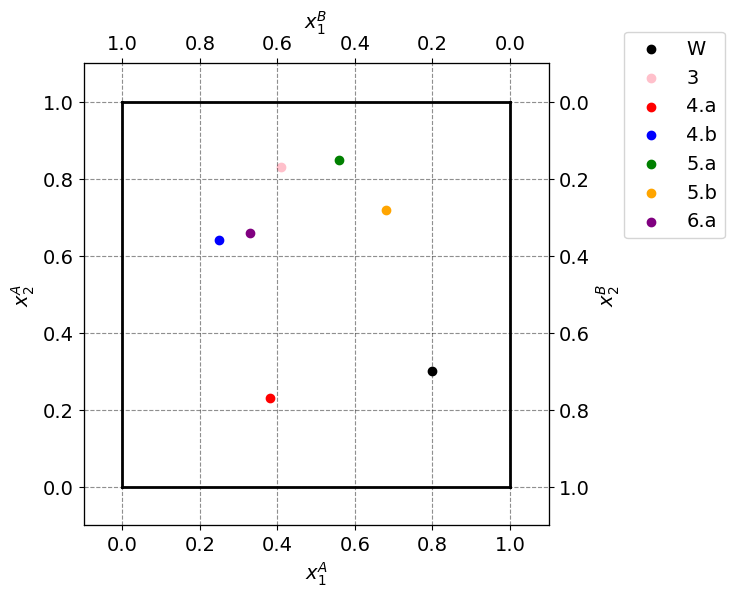

In [26]:
# 1. We set the points from the previous results 
previous_results = [(0.8, 0.3),
          (0.41, 0.83),
          (0.38, 0.23),
          (0.25, 0.64),
          (0.56, 0.85),
          (0.68, 0.72),
          (0.33, 0.66)] # Question 3, question 4.a

# 2. Set the labels for the points
labels_for_points = ['W', '3', '4.a', '4.b', '5.a', '5.b', '6.a']

# 3. Set the colors for the points
colors = ['black', 'pink', 'red', 'blue', 'green', 'orange', 'purple']

# 4. Creates an instance of the PointPlotter class
plot_of_previous_results = PointPlotter(previous_results, labels_for_points, colors)

# 5. Generates the plot
plot_of_previous_results.plot_the_previous_results()

In the figure above, we can see the 
<span style="color: black;">endowments</span> 
and the previous results in question 
<span style="color: pink;">3</span>, 
<span style="color: red;">4.a</span>, 
<span style="color: blue;">4.b</span>, 
<span style="color: green;">5.a</span>, 
<span style="color: orange;">5.b</span>, and 
<span style="color: purple;">6.a</span> 
in an Edgeworth Box. Below we list the previous results and compare them.


- <span style="color: black;">**Endowments**</span> (black): Here, the allocation is (0.8, 0.3). These are the allocations of the goods before the maximization has begun. Hence, the utility of the consumers have not been maximized.
- <span style="color: pink;">**Question 3**</span> (pink): Here, the optimal allocation for consumer A is: (0.41, 0.83) with the market clearing price. This is because the price is set for consumer A and B, where their utility is maximized based on their budget constraints.
- <span style="color: red;">**Question 4.a**</span> (red): Here, the optimal allocation for consumer A is: (0.38, 0.23). This allocation is reached when consumer A 
- <span style="color: blue;">**Question 4.b**</span> (blue): Here, the optimal allocation for consumer A is: (0.25, 0.64).
- <span style="color: green;">**Question 5.a**</span> (green): Here, the optimal allocation for consumer A is: (0.56, 0.85).
- <span style="color: orange;">**Question 5.b**</span> (orange): Here, the optimal allocation for consumer A is: (0.68, 0.72).
- <span style="color: purple;">**Question 6.a**</span> (purple): Here, the optimal allocation for consumer A is: (0.33, 0.66). With a utilitarian social planner, the utilities between consumer A and B will be weighed equally such that the allocations will be socially optimal. Therefore, the allocation lie closer to the centre of the Edgeworth box. Consumer A gets less than consumer B in regards to good 1 and more in regards to good 2. This is because of the different utility functions.

Overall, the assumptions (objective functions and ressource constraints) in the Exhange economy changes what the optimal allocation will be for the two consumers. It also shows that it is not possible, in this case, to maximize both the individual utility for consumer A and the total utility for consumer A and B.  

### 14. <a id='question7'></a>[Question 7 - Random Endowments](#question7)

In this question, we should draw a set with 50 elements based on this equation:

$$
\begin{aligned}
    \mathcal{W} = \left\{\left(\omega_1^A, \omega_2^A\right) \mid \omega_1^A \sim \mathcal{U}(0,1), \omega_2^A \sim \mathcal{U}(0,1) \right\}
\end{aligned}
$$

Element 1: (0.69, 0.54)
Element 2: (0.58, 0.60)
Element 3: (0.31, 0.86)
Element 4: (0.07, 0.85)
Element 5: (0.57, 0.23)
Element 6: (0.89, 0.58)
Element 7: (0.07, 0.83)
Element 8: (0.90, 0.42)
Element 9: (0.55, 0.62)
Element 10: (0.97, 0.67)
Element 11: (0.45, 0.22)
Element 12: (0.89, 0.26)
Element 13: (0.09, 0.67)
Element 14: (0.04, 0.33)
Element 15: (0.43, 0.89)
Element 16: (0.43, 0.72)
Element 17: (0.42, 0.45)
Element 18: (0.74, 0.29)
Element 19: (0.57, 0.65)
Element 20: (0.68, 0.08)
Element 21: (0.51, 0.37)
Element 22: (0.43, 0.39)
Element 23: (0.19, 0.86)
Element 24: (0.45, 0.81)
Element 25: (0.60, 0.35)
Element 26: (0.70, 0.85)
Element 27: (0.12, 0.76)
Element 28: (0.54, 0.55)
Element 29: (0.88, 0.46)
Element 30: (0.16, 0.49)
Element 31: (0.09, 0.48)
Element 32: (0.68, 0.90)
Element 33: (0.33, 0.27)
Element 34: (0.14, 0.97)
Element 35: (0.70, 0.77)
Element 36: (0.33, 0.21)
Element 37: (0.13, 0.59)
Element 38: (0.95, 0.19)
Element 39: (0.96, 0.51)
Element 40: (0.07, 0.04)
Element 4

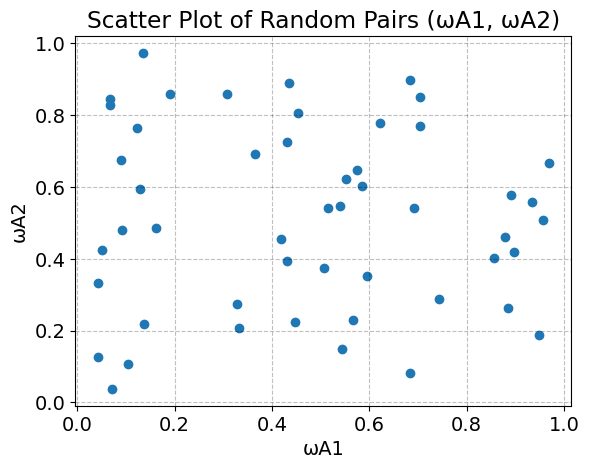

In [27]:
# 1. Create an instance of the class
random_endowments = EdgeworthBoxClass(alpha, beta, endowment_A, num_pairs=50)

# 2. Generate the random endowments 
random_endowments.generate_random_endowments()

# 3. Print random endowments
random_endowments.print_random_endowments()

# 4. Plot the random endowments
random_endowments.plot_random_endowments()

In the figure above, we can see a plot of the random endowments. They are random uniform generated, so they do not provide with intuitive insights.

### 15. <a id='question8'></a>[Question 8](#question8)

In this question, we should find the market equilibrium allocation for all of the endowment sets. 

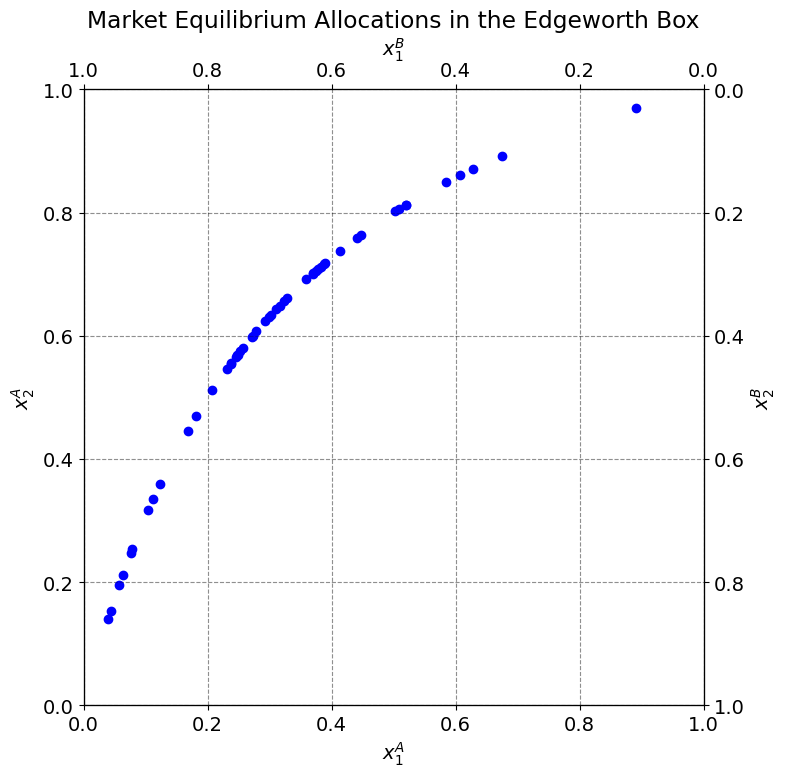

In [28]:
random_pareto_improvements = RandomParetoImprovements()
random_pareto_improvements.plot_of_the_random_pareto_improvements()

## 16. <a id='conclusion'></a>[Conclusion](#conclusion)